-- email classifier
-- news

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("D:\\batchs\\2023\\cvs .file\\spam.csv")

In [26]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.shape

(5572, 2)

In [28]:
df["Category"].replace({"ham": 0,"spam":1},inplace= True)

In [29]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


1.countvectorizer

down boyh step is same

In [30]:
df["Message"] = df["Message"].apply(lambda x : str(x))

[str(x) for x in df['Message']] - list comprehension

In [31]:
 df["Message"] = [str(x)for x in df['Message']]

In [32]:
 df["Message"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [33]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df['Message']
y = df["Category"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
X_train.shape

(4457,)

In [38]:
 y_train.shape

(4457,)

In [39]:
X_test.shape

(1115,)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer()

In [45]:
X_train_vect = vectorizer.fit_transform(X_train)

In [46]:
X_train_vect

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

In [47]:
X_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
X_train_vect.toarray().shape

(4457, 7701)

In [49]:
from sklearn.naive_bayes import BernoulliNB

In [50]:
model = BernoulliNB()

In [51]:
model.fit(X_train_vect,y_train)

BernoulliNB()

In [54]:
X_test_vect = vectorizer.transform(X_test)

In [55]:
model.score(X_test_vect,y_test)

0.9802690582959641

In [57]:
emails = ['Hey john, can we get together to watch football game tomorrow?',
         'upto 20% discount o parking,exclusive offer just for you.Dont miss this chance',
         'Get a FREE hoodie by calling 6688392 t&c apply'
         ]

In [59]:
email_vect =  vectorizer.transform(emails)

In [60]:
email_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
model.predict(email_vect)

array([0, 0, 0], dtype=int64)

In [62]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vect,y_train)
model.score(X_test_vect,y_test)

0.9919282511210762

In [63]:
model.predict(email_vect)

array([0, 1, 1], dtype=int64)

In [66]:
from sklearn.pipeline import Pipeline

In [67]:
clf = Pipeline([('vectorizer' , CountVectorizer()),('mb',MultinomialNB())])

In [68]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [70]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [71]:
clf.score(X_test,y_test)

0.9919282511210762

In [72]:
clf.predict(emails)

array([0, 1, 1], dtype=int64)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
import seaborn as sns

In [76]:
from sklearn.metrics import confusion_matrix

In [78]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

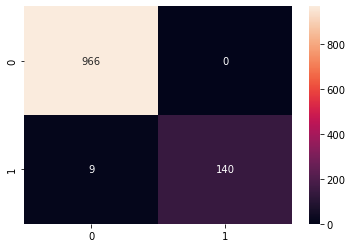

In [82]:
sns.heatmap(cm,annot = True ,fmt = "d")
